In [1]:
import rasterio
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from sarpy.visualization.remap import density
import pandas as pd
import glob
import os
import tensorflow as tf
from tensorflow.keras.utils import Progbar
from PIL import Image

In [2]:
vh_files = glob.glob('/tf/media/ryan/bigboi/datasets/xview3/train/src/*t/VH*tif')
vh_files

['/tf/media/ryan/bigboi/datasets/xview3/train/src/5d84646dd926df6ct/VH_dB.tif',
 '/tf/media/ryan/bigboi/datasets/xview3/train/src/a45bc46512eb61f8t/VH_dB.tif',
 '/tf/media/ryan/bigboi/datasets/xview3/train/src/41f1d693b803e19bt/VH_dB.tif',
 '/tf/media/ryan/bigboi/datasets/xview3/train/src/dac8263960d2d8b3t/VH_dB.tif',
 '/tf/media/ryan/bigboi/datasets/xview3/train/src/dcf7b37dd15d6d94t/VH_dB.tif',
 '/tf/media/ryan/bigboi/datasets/xview3/train/src/7508e51622c6c70ft/VH_dB.tif',
 '/tf/media/ryan/bigboi/datasets/xview3/train/src/d566639ea7b7529ft/VH_dB.tif',
 '/tf/media/ryan/bigboi/datasets/xview3/train/src/52d56395768fb8a7t/VH_dB.tif',
 '/tf/media/ryan/bigboi/datasets/xview3/train/src/d89c0f2ec5c4f159t/VH_dB.tif',
 '/tf/media/ryan/bigboi/datasets/xview3/train/src/d65838d1b71f58d2t/VH_dB.tif',
 '/tf/media/ryan/bigboi/datasets/xview3/train/src/876ba61d558b3219t/VH_dB.tif',
 '/tf/media/ryan/bigboi/datasets/xview3/train/src/b57201e9d0f56867t/VH_dB.tif',
 '/tf/media/ryan/bigboi/datasets/xview3/

In [3]:
bath_files = glob.glob('/tf/media/ryan/bigboi/datasets/xview3/train/src/*t/bath*tif')
wind_dir_files = glob.glob('/tf/media/ryan/bigboi/datasets/xview3/train/src/*t/*WindDirection*tif')
wind_qual_files = glob.glob('/tf/media/ryan/bigboi/datasets/xview3/train/src/*t/*WindQuality*tif')
wind_speed_files = glob.glob('/tf/media/ryan/bigboi/datasets/xview3/train/src/*t/*WindSpeed*tif')

In [4]:
df = pd.read_csv('/tf/media/ryan/bigboi/datasets/xview3/train/annotations/train.csv')
df.head()

,detect_lat,detect_lon,vessel_length_m,source,detect_scene_row,detect_scene_column,is_vessel,is_fishing,distance_from_shore_km,scene_id,confidence,top,left,bottom,right,detect_id
0,5.662924,4.842429,NaN,ais,16722,22703,NaN,NaN,9999.990000,e42a50089e03990ft,LOW,NaN,NaN,NaN,NaN,e42a50089e03990ft_005.66292355123628965430_004...
1,5.830786,4.794394,NaN,ais,14867,22165,False,NaN,9999.990000,e42a50089e03990ft,HIGH,NaN,NaN,NaN,NaN,e42a50089e03990ft_005.83078557395605034941_004...
2,5.650289,5.076500,NaN,ais,16853,25297,False,NaN,4.120485,e42a50089e03990ft,HIGH,NaN,NaN,NaN,NaN,e42a50089e03990ft_005.65028885294942995188_005...
3,5.865495,4.938335,NaN,ais,14478,23758,False,NaN,4.344042,e42a50089e03990ft,HIGH,NaN,NaN,NaN,NaN,e42a50089e03990ft_005.86549528127105990194_004...
4,5.777973,4.910044,NaN,ais,15447,23448,False,NaN,9999.990000,e42a50089e03990ft,HIGH,NaN,NaN,NaN,NaN,e42a50089e03990ft_005.77797292764882008953_004...


In [7]:
img = rasterio.open(vh_files[0]).read(1)
img[img==-32768.0] = 0.0
img[img!=0.0] = img[img!=0.0] - np.amin(img)

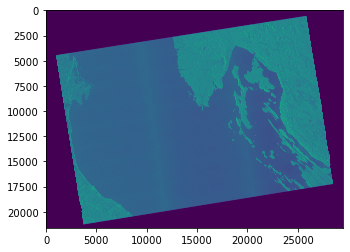

In [8]:
plt.imshow(img)
plt.show()

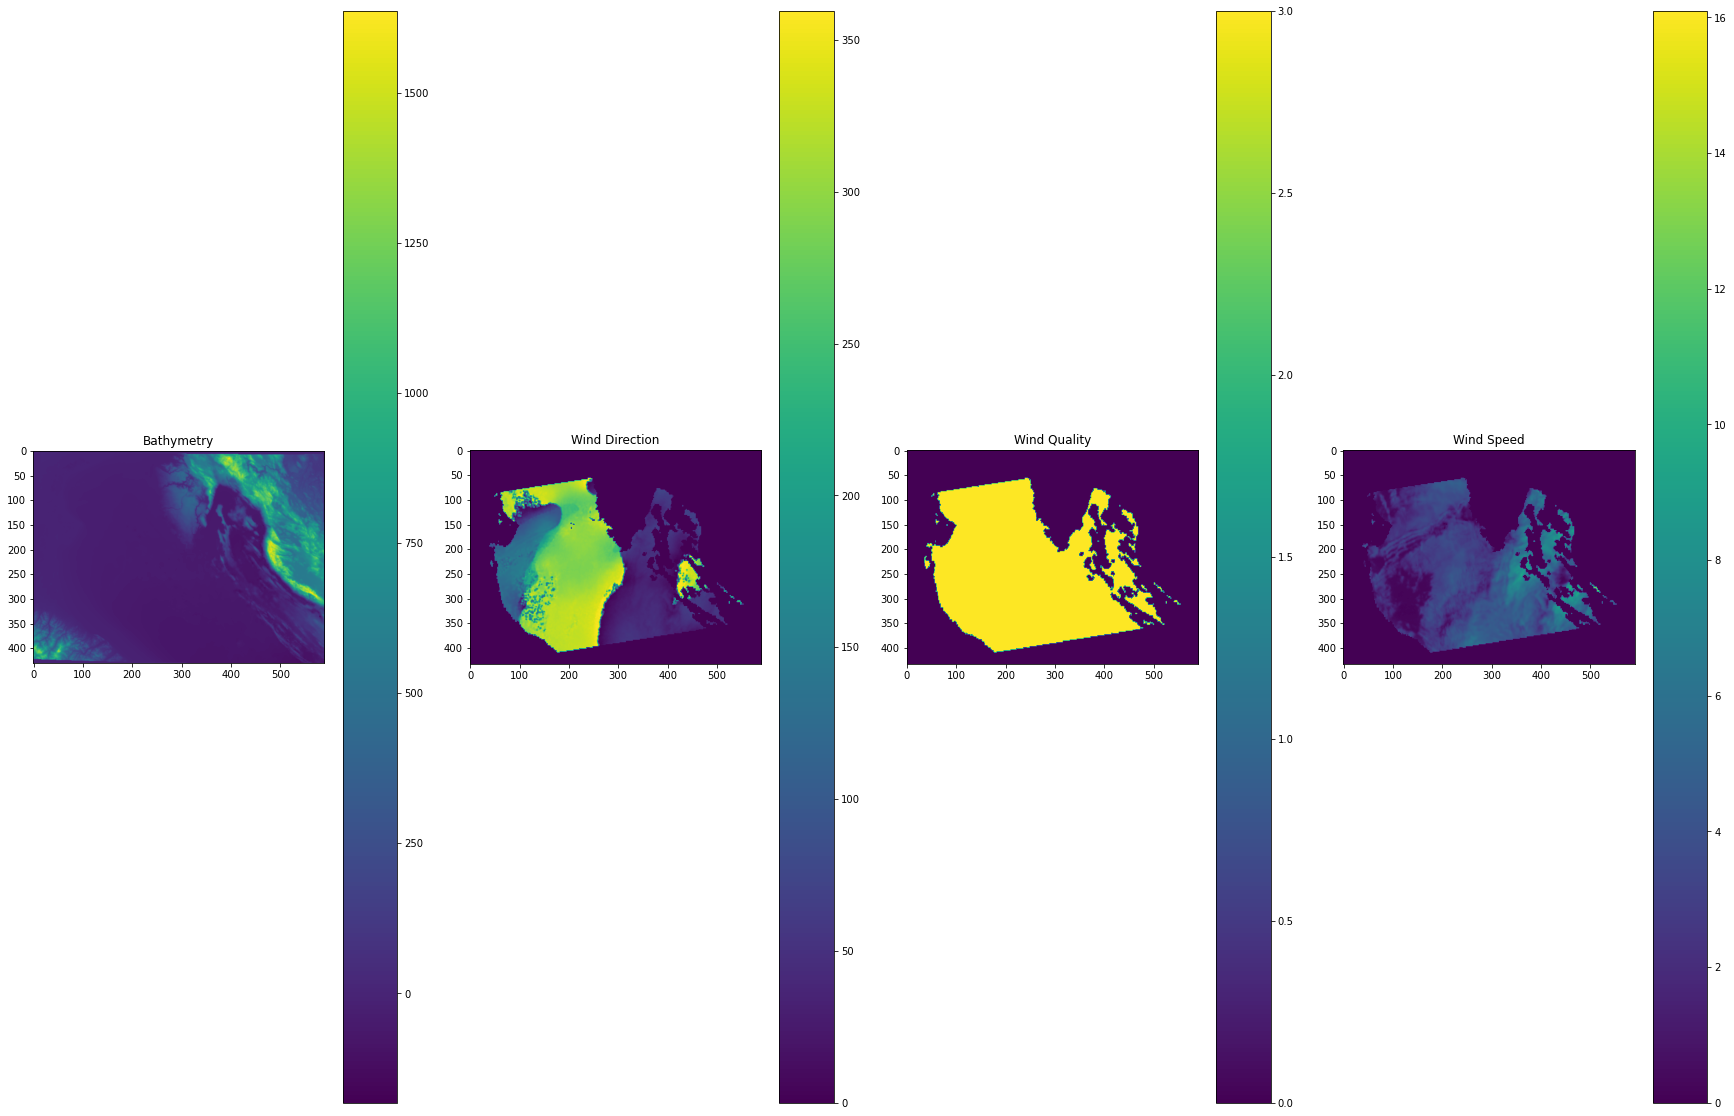

In [94]:
plt.figure(figsize=(30,30))

plt.subplot(1,4,1)
plt.title("Bathymetry")
img = rasterio.open(bath_files[0]).read(1)
img[img==-32768.0] = 0.0
plt.imshow(img)
plt.colorbar()

plt.subplot(1,4,2)
plt.title("Wind Direction")
img = rasterio.open(wind_dir_files[0]).read(1)
img[img==-32768.0] = 0.0
plt.imshow(img)
plt.colorbar()

plt.subplot(1,4,3)
plt.title("Wind Quality")
img = rasterio.open(wind_qual_files[0]).read(1)
img[img==-32768.0] = 0.0
plt.imshow(img)
plt.colorbar()

plt.subplot(1,4,4)
plt.title("Wind Speed")
img = rasterio.open(wind_speed_files[0]).read(1)
img[img==-32768.0] = 0.0
plt.imshow(img)
plt.colorbar()

plt.show()

In [7]:
# import tensorflow as tf
# import keras
import pandas as pd
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
import time
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.linear_model import LinearRegression

from scipy.signal import hilbert
from scipy.signal import hann
from scipy.signal import convolve
from scipy import stats
from sklearn.kernel_ridge import KernelRidge
from tqdm import tqdm_notebook
import seaborn as sns

from sklearn.model_selection import train_test_split

import pickle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score, accuracy_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, opening, remove_small_objects
from skimage.color import label2rgb
import pandas as pd

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import adapted_rand_error, hausdorff_distance, mean_squared_error, peak_signal_noise_ratio, variation_of_information
from skimage.feature.texture import greycoprops
from skimage.filters import sobel, sobel_h, sobel_v
from skimage.feature import hog
from skimage import data, exposure

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import *
import glob
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys

from tensorflow.keras.models import Model
from tensorflow.python.keras.applications import resnet, resnet_v2
from tensorflow.keras.optimizers import Adam

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import *
import glob
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras_efficientnet_v2 import EfficientNetV2S
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import Progbar

In [10]:
def read_npy(f):
    arr = np.load(f.numpy().decode(), allow_pickle=True)[()]
    x = arr['img'][0]
    y = arr['label'][0]
    
    x_shape = x.shape
    y_shape = y.shape
    
    x = tf.constant(x, dtype=tf.float32, shape=x_shape)
    y = tf.constant(y, dtype=tf.float32, shape=y_shape)
    
    return x, y

In [8]:
def read_labeled_tfrecord(example):
    tfrec_format = {
        'img'        : tf.io.FixedLenSequenceFeature([], tf.float32, allow_missing=True),
        'img_height' : tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
        'img_width'  : tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
        'label'      : tf.io.FixedLenSequenceFeature([], tf.float32, allow_missing=True),
        'scene_id'   : tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True),
        'detect_scene_row' :  tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
        'detect_scene_column' : tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
    }
    
    example = tf.io.parse_single_example(example, tfrec_format)
    
    
    h = example['img_height']
    w = example['img_width']
    img = example['img']
    label = example['label']
    id = example['scene_id']
    r = example['detect_scene_row']
    c = example['detect_scene_column']
    
    img = tf.reshape(img, shape=(h[0],w[0],3))
    
    img.set_shape((64,64,3))
    
    return img, label, id, r, c

In [9]:
def set_shape_ds(x, y, BATCH_SIZE):
    x = x.set_shape((BATCH_SIZE, 64,64,3))
    y = y.set_shape((BATCH_SIZE, 1))
    return x, y

In [10]:
def create_datagen(files, shuffle = False, repeat = False, batch_size=16, aug=False, progressive_training=False):
    
    ds = tf.data.TFRecordDataset(files, num_parallel_reads=tf.data.AUTOTUNE)
    
    ds = ds.cache()
    
    if repeat:
        ds = ds.repeat()
    
    if shuffle: 
        ds = ds.shuffle(1024*2)
        opt = tf.data.Options()
        opt.experimental_deterministic = False
        ds = ds.with_options(opt)
        
    ds = ds.map(lambda example: read_labeled_tfrecord(example), 
                    num_parallel_calls=tf.data.AUTOTUNE)      
    
    if aug:
        ds = ds.batch(1)
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                    num_parallel_calls=tf.data.AUTOTUNE)
        ds = ds.unbatch()

    if progressive_training:
        ds = ds.map(lambda x, y: train_process(x, y), num_parallel_calls=tf.data.AUTOTUNE)

    
    ds = ds.batch(batch_size)
    
    ds = ds.prefetch(tf.data.AUTOTUNE)
    
    ds = ds.apply(tf.data.experimental.ignore_errors())
    
    return ds

In [14]:
files = glob.glob('/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_high/*')
files.extend(glob.glob('/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_med/*'))

In [15]:
files

['/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_high/train_shard_8.tfrec',
 '/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_high/train_shard_5.tfrec',
 '/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_high/train_shard_15.tfrec',
 '/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_high/train_shard_4.tfrec',
 '/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_high/train_shard_14.tfrec',
 '/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_high/train_shard_6.tfrec',
 '/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_high/train_shard_13.tfrec',
 '/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_high/train_shard_12.tfrec',
 '/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_high/train_shard_7.tfrec',
 '/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_high/train_shard_1.tfrec',
 '/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_high/train_shard_9.tfrec',
 '/tf/media/ryan/bigboi/datasets/xview3/train/tfrecords_high/train_shard_0.tfrec',


In [16]:
all_files=0
npy_files = glob.glob('/tf/media/ryan/bigboi/datasets/xview3/train/npy_med/*')
all_files+=len(npy_files)
npy_files = glob.glob('/tf/media/ryan/bigboi/datasets/xview3/train/npy_high/*')
all_files+=len(npy_files)

In [17]:
all_files

53067

In [18]:
BATCH_SIZE = 1
MIX_UP_P=0.1
SHARD_SIZE=1000

#training generator
train_gen = create_datagen(files,
                           shuffle=False,
                           repeat=False,
                           batch_size=BATCH_SIZE,
                           aug=False,
                           progressive_training=False)

training_steps = int(np.ceil((len(files)*SHARD_SIZE)/BATCH_SIZE))

In [19]:
X_tr = pd.DataFrame(index=range(all_files), dtype=np.float64)
pbar = Progbar(all_files)

for j, (img, label, id, r, c) in enumerate(train_gen):
    img_id = id[0][0].numpy().decode()
    row = r[0][0].numpy()
    col = c[0][0].numpy()
    
    X_tr.loc[j, f'img_id'] = img_id
    X_tr.loc[j, f'det_row'] = row
    X_tr.loc[j, f'det_col'] = col

    pbar.add(1)

53067/53067 [==============================] - 201s 4ms/step


In [20]:
X_tr.to_csv('./id_r_c.csv')

In [ ]:
# bath_files
# wind_dir_files
# wind_qual_files 
# wind_speed_files

In [89]:
X_tr = pd.DataFrame(index=range(all_files), dtype=np.float64)

base_path = '/tf/media/ryan/bigboi/datasets/xview3/train/src/'
pbar = Progbar(all_files)

for j, (img, label, id, r, c) in enumerate(train_gen):
    
    img_id = id[0][0].numpy().decode()
    row = r[0][0].numpy() // 50
    col = c[0][0].numpy() // 50
    
    bath_path = base_path+img_id+'/bathymetry.tif'
    wind_dir_path = base_path+img_id+'/owiWindDirection.tif'
    wind_qual_path = base_path+img_id+'/owiWindQuality.tif'
    wind_speed_path = base_path+img_id+'/owiWindSpeed.tif'
    
    img = rasterio.open(bath_path).read(1)
    img[img==-32768.0] = 0.0
    X_tr.loc[j, f'bathymetry'] = img[row, col]
    
    img = rasterio.open(wind_dir_path).read(1)
    img[img==-32768.0] = 0.0
    X_tr.loc[j, f'owiWindDirection'] = img[row, col]
    
    img = rasterio.open(wind_qual_path).read(1)
    img[img==-32768.0] = 0.0
    X_tr.loc[j, f'owiWindQuality'] = img[row, col]
    
    img = rasterio.open(wind_speed_path).read(1)
    img[img==-32768.0] = 0.0
    X_tr.loc[j, f'owiWindSpeed'] = img[row, col]
    
#     break
    pbar.add(1)

53067/53067 [==============================] - 767s 14ms/step


In [90]:
X_tr

,bathymetry,owiWindDirection,owiWindQuality,owiWindSpeed
0,-3.171875,225.2500,3.0,3.818359
1,-24.031250,221.7500,3.0,1.943359
2,-8.078125,255.2500,0.0,8.421875
3,-10.140625,270.7500,3.0,2.445312
4,-16.390625,307.0000,0.0,11.609375
...,...,...,...,...
53062,-2576.000000,218.0000,2.0,9.632812
53063,-36.718750,91.9375,2.0,7.687500
53064,-3970.000000,352.0000,3.0,5.378906
53065,-1330.000000,224.1250,3.0,4.296875


In [91]:
X_tr.to_csv('./meta_features.csv')

# Holdout testset

In [11]:
test_files = sorted(glob.glob('/tf/media/ryan/bigboi/datasets/xview3/val/tfrecords_all/*'))
test_npy_files = glob.glob('/tf/media/ryan/bigboi/datasets/xview3/val/npy_all/*')

In [12]:
len(test_npy_files)

19224

In [13]:
test_gen = create_datagen(test_files,
                           shuffle=False,
                           repeat=True,
                           batch_size=1,
                           aug=False,
                           progressive_training=False)

In [14]:
X_tr = pd.DataFrame(index=range(len(test_npy_files)), dtype=np.float64)

base_path = '/tf/media/ryan/bigboi/datasets/xview3/val/src/'
pbar = Progbar(len(test_npy_files))

for j, (img, label, id, r, c) in enumerate(test_gen):
    
    img_id = id[0][0].numpy().decode()
    row = r[0][0].numpy() // 50
    col = c[0][0].numpy() // 50
    
    bath_path = base_path+img_id+'/bathymetry.tif'
    wind_dir_path = base_path+img_id+'/owiWindDirection.tif'
    wind_qual_path = base_path+img_id+'/owiWindQuality.tif'
    wind_speed_path = base_path+img_id+'/owiWindSpeed.tif'
    
    img = rasterio.open(bath_path).read(1)
    img[img==-32768.0] = 0.0
    X_tr.loc[j, f'bathymetry'] = img[row, col]
    
    img = rasterio.open(wind_dir_path).read(1)
    img[img==-32768.0] = 0.0
    X_tr.loc[j, f'owiWindDirection'] = img[row, col]
    
    img = rasterio.open(wind_qual_path).read(1)
    img[img==-32768.0] = 0.0
    X_tr.loc[j, f'owiWindQuality'] = img[row, col]
    
    img = rasterio.open(wind_speed_path).read(1)
    img[img==-32768.0] = 0.0
    X_tr.loc[j, f'owiWindSpeed'] = img[row, col]
    
#     break
    pbar.add(1)
    
    if j == len(test_npy_files)-1:
        break

19225/19224 [==============================] - 274s 14ms/step


In [25]:
X_tr.shape
X_tr.tail()

,bathymetry,owiWindDirection,owiWindQuality,owiWindSpeed
19220,-2.892578,334.50,0.0,6.320312
19221,-11.000000,263.75,3.0,4.015625
19222,10.039062,0.00,0.0,0.000000
19223,-42.406250,249.75,0.0,10.375000
19224,-10.867188,0.00,0.0,0.000000


In [20]:
X_tr_trim = X_tr.iloc[:-1,:]

In [26]:
X_tr_trim.tail()

,bathymetry,owiWindDirection,owiWindQuality,owiWindSpeed
19219,-17.046875,129.375,0.0,6.792969
19220,-2.892578,334.500,0.0,6.320312
19221,-11.000000,263.750,3.0,4.015625
19222,10.039062,0.000,0.0,0.000000
19223,-42.406250,249.750,0.0,10.375000


In [27]:
X_tr_trim.to_csv('./meta_features_TEST.csv')